In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

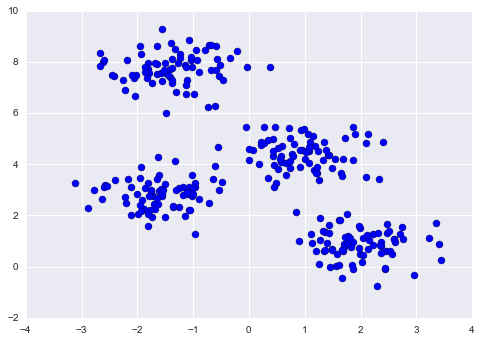

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=300,centers=4,
               random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],s=50)

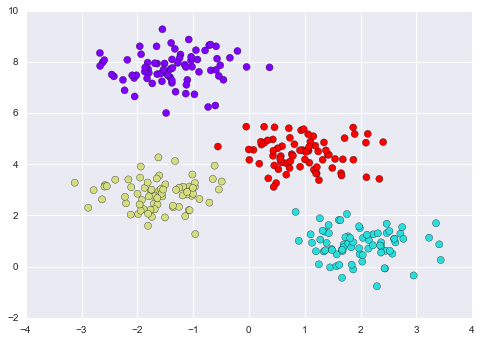

In [9]:
from sklearn.cluster import KMeans
est = KMeans(4)
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='rainbow')

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

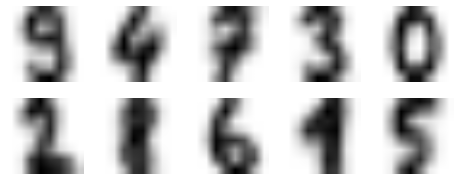

In [22]:
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2,5,1+i,xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

0.79076238174735669

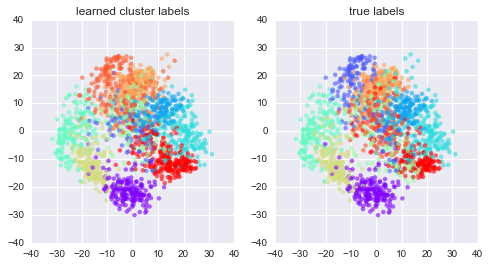

In [24]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(digits.data)
kwargs = dict(cmap=plt.cm.get_cmap('rainbow',10),
             edgecolor='none',alpha=0.6)
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0],X[:,1],c=labels,**kwargs)
ax[0].set_title('learned cluster labels')
ax[1].scatter(X[:,0],X[:,1],c=digits.target,**kwargs)
ax[1].set_title('true labels')

from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   6   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   0   1 137   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   2   0   7   2   2 100  52]
 [  0  20   0   6   0   7   0   7   1 139]]


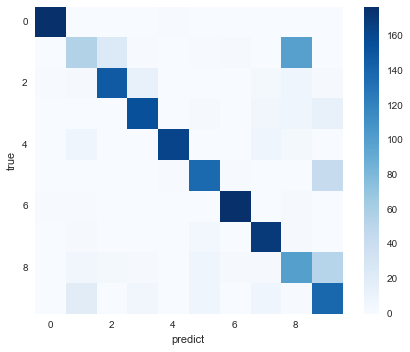

In [27]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(digits.target,labels)
plt.imshow(confusion_matrix(digits.target,labels),
          cmap='Blues',interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predict')